In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

FileExistsError: [Errno 17] File exists: 'data/positive'

In [ ]:
# Uncompress Tar GZ Labelled Faces in the Wild Dataset
!tar -xf lfw.tgz


gzip: stdin: unexpected end of file
tar: Unexpected EOF in archive
tar: Unexpected EOF in archive
tar: Error is not recoverable: exiting now


In [ ]:
# Move LFW Images to the following repository data/negative
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)  # Existing file path
        NEW_PATH = os.path.join(NEG_PATH, file)         # New file path (negative folder)
        os.replace(EX_PATH, NEW_PATH)                   # Move the file to the new folder


In [ ]:
os.listdir('lfw')

['Kate_Winslet',
 'Rolf_Zimmermann',
 'Mark_Kelly',
 'Robert_Lee_Yates_Jr',
 'Stephanie_Zimbalist',
 'Hatsui_Hasuike',
 'Lori_Berenson',
 'Martina_Hingis',
 'Danny_Avalon',
 'Kate_Hudson',
 'Edmund_Stoiber',
 'Charlton_Heston',
 'Terry_Bradshaw',
 'Hans_Blix',
 'Abbas_Kiarostami',
 'Bob_Graham',
 'Vladimir_Meciar',
 'Drew_Gooden',
 'Oracene_Williams',
 'Kevin_Garnett',
 'Juan_Pablo_Montoya',
 'Franz_Muentefering',
 'Marco_Antonio_Barrera',
 'Alex_Barros',
 'Vicente_Fox',
 'Vojislav_Kostunica',
 'Pamela_Melroy',
 'Mike_Tice',
 'Edward_Said',
 'David_Trimble',
 'Perri_Shaw',
 'David_Westerfield',
 'Johnny_Tapia',
 'Nebojsa_Pavkovic',
 'Irwan_Fadzi_Idris',
 'Richard_Branson',
 'Fernando_Vargas',
 'Benjamin_Netanyahu',
 'Mathias_Reichhold',
 'Mike_Samp',
 'Stephen_Frears',
 'Ted_Washington',
 'James_Harris',
 'Erika_Harold',
 'Robert_Redford',
 'Scott_Sullivan',
 'Richard_Regenhard',
 'Cecilia_Chang',
 'Scott_Ritter',
 'George_Karl',
 'Eve_Ensler',
 'Jorge_Moreno',
 'Mark_Komara',
 'Jose_S

In [ ]:
import uuid

<IPython.core.display.Javascript object>

Image captured and saved to: captured_image.jpg


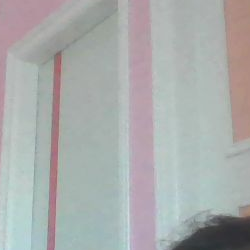

In [ ]:
# Install the necessary libraries
!pip install opencv-python-headless

import cv2
import uuid
import os
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np

# Helper functions to capture image in Colab
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const video = document.createElement('video');
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to the size of the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Capture the image from the video stream.
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getTracks().forEach(track => track.stop());
      const imageData = canvas.toDataURL('image/jpeg', quality);
      div.remove();
      return imageData;
    }
    ''')

    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Capture image using Colab camera integration
try:
    img_path = take_photo('captured_image.jpg')
    print('Image captured and saved to:', img_path)

    # Read the captured image
    img = cv2.imread(img_path)

    # Cut down frame to 250x250px
    frame = img[120:120+250,200:200+250, :]

    # Show the cropped image
    cv2_imshow(frame)

    # Save the anchor and positive images
    ANC_PATH = "/content/data/anchor"
    POS_PATH = "/content/data/positive"

    # Collect anchors
    imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
    cv2.imwrite(imgname, frame)

    # Collect positives
    imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
    cv2.imwrite(imgname, frame)

except Exception as e:
    print('Error capturing image:', str(e))


In [ ]:
import cv2
import numpy as np
import uuid
import os
from google.colab.patches import cv2_imshow

# Paths where you want to save images
ANC_PATH = '/content/anchors/'
POS_PATH = '/content/positives/'

# Create directories if they don't exist
os.makedirs(ANC_PATH, exist_ok=True)
os.makedirs(POS_PATH, exist_ok=True)

# Load the video file
video_path = '/content/your_uploaded_video.mp4'  # Replace with your uploaded video file name
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Cut down frame to 250x250px
    frame = frame[120:120+250, 200:200+250, :]

    # Display the image in Colab
    cv2_imshow(frame)

    # Collect anchors and positives based on user input
    key = cv2.waitKey(1) & 0XFF
    if key == ord('a'):
        # Create the unique file path
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)

    if key == ord('p'):
        # Create the unique file path
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgname, frame)

    # Breaking gracefully
    if key == ord('q'):
        break

# Release the video capture
cap.release()
cv2.destroyAllWindows()
